## Dimension reduction summarizes a dataset using its common occuring patterns. In this chapter, you'll learn about the most fundamental of dimension reduction techniques, "Principal Component Analysis" ("PCA"). PCA is often used before supervised learning to improve model performance and generalization. It can also be useful for unsupervised learning. For example, you'll employ a variant of PCA will allow you to cluster Wikipedia articles by their content!

### Correlated data in nature
You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
grains = pd.read_csv('Grains/seeds-width-vs-length.csv', header = None)
grains.head()

,0,1
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


In [5]:
grains = grains.values

0.8604149377143467

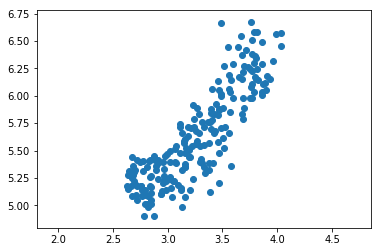

In [7]:
# Perform the necessary imports
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:, 0]

# Assign the 1st column of grains: length
length = grains[:, 1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
correlation

### Decorrelating the grain measurements with PCA
You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

4.983104599635362e-17

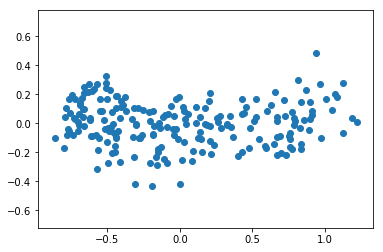

In [9]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
correlation

### The first principal component
The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

__Instructions__
- Make a scatter plot of the grain measurements.
- Create a PCA instance called model.
- Fit the model to the grains data.
- Extract the coordinates of the mean of the data using the .mean_ attribute of model.
- Get the first principal component of model using the .components_[0,:] attribute.
- Plot the first principal component as an arrow on the scatter plot, using the plt.arrow() function. You have to specify the first two arguments - mean[0] and mean[1].

(2.549993369175627, 4.113006630824374, 4.795023399558499, 6.778976600441501)

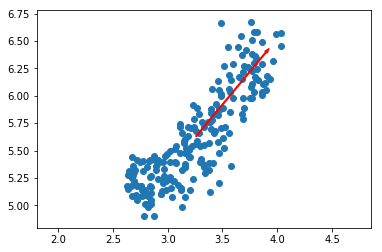

In [10]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')

### Variance of the PCA features
The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

__Instructions__
- Create an instance of StandardScaler called scaler.
- Create a PCA instance called pca.
- Use the make_pipeline() function to create a pipeline chaining scaler and pca.
- Use the .fit() method of pipeline to fit it to the fish samples samples.
- Extract the number of components used using the .n_components_ attribute of pca. Place this inside a range() function and store the result as features.
- Use the plt.bar() function to plot the explained variances, with features on the x-axis and pca.explained_variance_ on the y-axis.

In [12]:
fish = pd.read_csv('fish.csv', header = None)
fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [13]:
samples = fish.iloc[:, 1:].values

([<matplotlib.axis.XTick at 0x1590e2d0>,
 <a list of 6 Text xticklabel objects>)

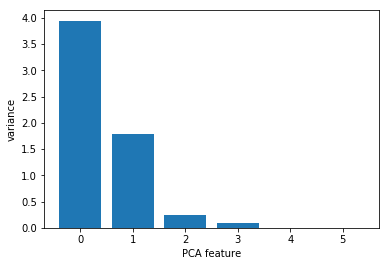

In [14]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)

In [17]:
pca.explained_variance_

array([3.94616746e+00, 1.78097907e+00, 2.43235593e-01, 1.00351845e-01,
       5.63140996e-04, 1.31462706e-04])

### Dimension reduction of the fish measurements
In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

The fish measurements have already been scaled for you, and are available as samples.

In [22]:
scaler = StandardScaler()

In [23]:
samples = scaler.fit_transform(samples)

In [26]:
samples.shape

(85, 6)

In [27]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components = 2)

# Fit the PCA instance to the scaled samples
pca.fit(samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(samples)

# Print the shape of pca_features
pca_features.shape

(85, 2)

#### Superb! You've successfully reduced the dimensionality from 6 to 2.

### A tf-idf word-frequency array
In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

You are given a list documents of toy documents about pets. Its contents have been printed in the IPython Shell.

In [28]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

__Instructions__
- Import TfidfVectorizer from sklearn.feature_extraction.text.
- Create a TfidfVectorizer instance called tfidf.
- Apply .fit_transform() method of tfidf to documents and assign the result to csr_mat. This is a word-frequency array in csr_matrix format.
- Inspect csr_mat by calling its .toarray() method and printing the result.
- The columns of the array correspond to words. Get the list of words by calling the .get_feature_names() method of tfidf, and assign the result to words.

In [29]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
words

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]


['cats', 'chase', 'dogs', 'meow', 'say', 'woof']

### Clustering Wikipedia part I
`TruncatedSVD` is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

The Wikipedia dataset you will be working with was obtained from [here](https://blog.lateral.io/2015/06/the-unknown-perils-of-mining-wikipedia/).

__Instructions__
- Import:
    - TruncatedSVD from sklearn.decomposition.
    - KMeans from sklearn.cluster.
    - make_pipeline from sklearn.pipeline.
- Create a TruncatedSVD instance called svd with n_components=50.
- Create a KMeans instance called kmeans with n_clusters=6.
- Create a pipeline called pipeline consisting of svd and kmeans.

In [30]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components = 50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters = 6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

### Clustering Wikipedia part II
It is now time to put your pipeline from the previous exercise to work! You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles. Use your pipeline to cluster the Wikipedia articles.

To preprocess `wikipedia-vectors.csv` into the format in which you used it in the exercises, you have to take its transpose:

```python
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)
```

The reason for taking this transpose is that without it, there would be 13,000 columns (corresponding to the 13,000 words in the file), which is a lot of columns for a CSV to have.


In [32]:
from scipy.sparse import csr_matrix

In [33]:
df = pd.read_csv('Wikipedia articles/wikipedia-vectors.csv', index_col = 0)
df.head()

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [34]:
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [36]:
articles

<60x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 42091 stored elements in Compressed Sparse Row format>

In [38]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
df.sort_values('label')

,label,article
59,0,Adam Levine
57,0,Red Hot Chili Peppers
56,0,Skrillex
55,0,Black Sabbath
54,0,Arctic Monkeys
53,0,Stevie Nicks
52,0,The Wanted
51,0,Nate Ruess
50,0,Chad Kroeger
58,0,Sepsis


#### Fantastic! Take a look at the cluster labels and see if you can identify any patterns!